# Comparing central tendency of two groups

1. Brief intro using Normal distributions
2. Introducing 2 data sets
   - UCLA salary: heavily skewed data
   - Carbon Dioxide rates in chilled and not-chilled plants: less skewed
   - Assessment of normal assumptions
3. Standard Statistics
   - Student 
   - Welch t-test
   - Nonparametric Mann-Whitney-Wilcoxon test
4. Bootstrap statistics
   - Big-Box (student-like)
   - Two-Box (whelch-like)
   - Rank (mww-like)
   - Confidence intervals approach
5. Effect Size

---

## 1. Introduction

Testing the difference between two means is one of the most common tasks for statistical inference. Using Gaussian curves, let's demonstrate the underlying principals for the following sections.

In [1]:
#initialize workspace
%run _init.py
#config matplotlib to not use dynamic figures
%matplotlib inline
#config matplotlib backend to generate low weight pngs
%config InlineBackend.figure_format = 'png'

In [2]:
# Local Functions
def normalOverlap(x,d1Opts = {"loc":0, "scale":1},d2Opts = {"loc":0, "scale":1}):
    return np.minimum(stats.norm.pdf(x,**d1Opts), stats.norm.pdf(x,**d2Opts));
def normalCombination(x,d1Opts = {"loc":0, "scale":1},d2Opts = {"loc":0, "scale":1}):
    return np.maximum(stats.norm.pdf(x,**d1Opts), stats.norm.pdf(x,**d2Opts));
def mad(x,measure='mean'):
    measure = utils.validateString(measure,['mean','median']);
    x = np.ravel(x);
    if measure == 'mean':
        stat = np.mean;
    elif measure == 'median':
        stat = np.median;
    return np.mean(np.abs(x - stat(x)))
def welchT(s1,s2,center='mean',spread='sd'):
    center = utils.validateString(center,['mean','median']);
    spread = utils.validateString(spread, ['sd','mad']);
    if center == 'median':
        cen = np.median;
    else:
        cen = np.mean;
    if spread == 'mad':
        spr = mad;
    else:
        spr = np.mean;
    s1 = np.ravel(s1);
    s2 = np.ravel(s2);
    dif = cen(s1)-cen(s2);
    vrnc = np.sqrt( ((spr(s1)**2)/s1.shape[0]) + ((spr(s2)**2)/s2.shape[0]));
    return dif/vrnc

In [3]:
#create gaussian data
N = 10000
X = np.random.uniform(low=-3, high=3.5,size=N);
xs = np.linspace(-3.1,3.6,600)
Ysamp1 = np.random.uniform(low=0, high= 0.41, size=N)
Ysamp2 = np.random.uniform(low=0, high= 0.41, size=N)

d1Params = dict(loc=0,scale=1);
d2Params = dict(loc=0.5,scale=1);

D1 = {
    'x': X[Ysamp1 <= stats.norm.pdf(X,**d1Params)],
    'y': Ysamp1[Ysamp1 <= stats.norm.pdf(X,**d1Params)]
};
D2 = {
    'x': X[Ysamp2 <= stats.norm.pdf(X,**d2Params)],
    'y': Ysamp2[Ysamp2 <= stats.norm.pdf(X,**d2Params)]
};
OVLP = {
    'x': X[Ysamp1 <= normalOverlap(X,d1Params,d2Params)],
    'y': Ysamp1[Ysamp1 <= normalOverlap(X,d1Params,d2Params)]
};
SET = {
    'x': X[Ysamp1 <= normalCombination(X,d1Params,d2Params)],
    'y': Ysamp1[Ysamp1 <= normalCombination(X,d1Params,d2Params)]
};

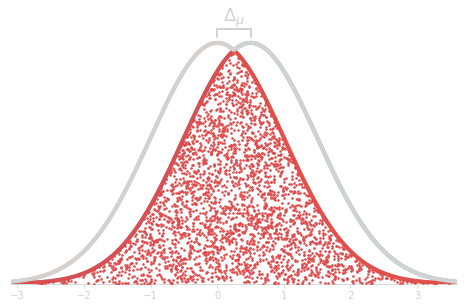

In [4]:
# Opener plot with 2 gaussians
fig = pyp.figure(figsize=(8,5))
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=11,concatOriginal=True,concatFirst=True);

# Plot the group1 axs[5:7]
axs[1].plot(xs, stats.norm.pdf(xs,**d1Params), color = col['orange'], lw = 4, alpha = 0.75);

# Plot group2
axs[2].plot(xs, stats.norm.pdf(xs,**d2Params), color = col['satBlue'], lw = 4, alpha = 0.75)

# plot cohens d
axs[3].annotate(
    '',
    xy = (0.5,0.405),
    xytext = (0,0.405),
    color = col['grey'],
    size = 14,
    ha = 'left',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': '-',
        'edgecolor': col['grey'],
        'facecolor': col['grey'],
        'connectionstyle': 'bar,fraction=-0.3',
        'lw': 2
    }
);
axs[3].text(0.25,0.42,r'$\Delta_{\mu}$', color=col['grey'], size=18,ha='center',va='bottom');

# Plot the merge only a[1:3]
axs[4].plot(xs, normalOverlap(xs,d1Params,d2Params), color = col['red'], lw = 4, alpha = 0.95)
axs[5].scatter(**OVLP,color = col['red'], marker='.',s=10,alpha = 0.95);

# plot the total set
axs[6].plot(xs, normalCombination(xs,d1Params,d2Params), color = col['grey'], lw = 4)

## format axes:
for ax in axs:
    if ax is not axs[0]:
        ax.axis('off');
    ax.set_ylim((0,0.45));
    ax.set_xlim((-3.1,3.6));
    ax.spines['left'].set_visible(False);
    ax.set_yticks([]);

fig.savefig('../img/lecture7opener.svg', transparent=True);

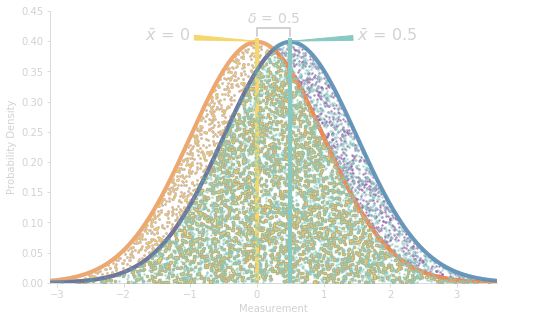

In [5]:
#Plot
fig = pyp.figure(figsize=(8,5))
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=11,concatOriginal=True,concatFirst=True);

# axs[0] => the axes only
axs[0].set_xlabel("Measurement");
axs[0].set_ylabel("Probability Density");

# Plot the group1 axs[5:7]
axs[5].scatter(**D1,marker='.', s = 10, color = col['yellow'],alpha=0.5);
axs[6].plot(xs, stats.norm.pdf(xs,**d1Params), color = col['orange'], lw = 4, alpha = 0.75);
axs[7].vlines(0, 0, 0.405,color=col['yellow'], lw=4);
axs[7].annotate(
    r'$\bar{x}\, =\, 0$',
    xy= (0,0.4),
    xytext = (-1,0.4),
    size = 16,
    color = col['grey'],
    ha='right',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['yellow'],
        'facecolor': col['yellow'],
        
    }
);

# Plot group2
axs[8].scatter(**D2,marker='.', s = 10, color = col['blue'],alpha=0.5);
axs[9].plot(xs, stats.norm.pdf(xs,**d2Params), color = col['satBlue'], lw = 4, alpha = 0.75)
axs[10].vlines(0.5, 0,0.405,color=col['blue'], lw=4);
axs[10].annotate(
    r'$\bar{x}\, =\, 0.5$',
    xy= (0.5,0.4),
    xytext = (1.5,0.4),
    size = 16,
    color = col['grey'],
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['blue'],
        'facecolor': col['blue'],
        
    }
);

# plot cohens d
axs[11].annotate(
    '',
    xy = (0.5,0.405),
    xytext = (0,0.405),
    color = col['grey'],
    size = 14,
    ha = 'left',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': '-',
        'edgecolor': col['grey'],
        'facecolor': col['grey'],
        'connectionstyle': 'bar,fraction=-0.3',
        'lw': 2
    }
);
axs[11].text(0.25,0.43,r'$\delta\, = \, 0.5$', color=col['grey'], size=14,ha='center');

# Plot the merge only a[1:3]
axs[1].scatter(**OVLP,marker='.', s = 30, color = col['green'],alpha=0.5);
axs[2].plot(xs, normalOverlap(xs,d1Params,d2Params), color = col['red'], lw = 4, alpha = 0.95)

# plot the total set
axs[3].scatter(**SET,marker='.', s = 10, color = col['purple'],alpha=0.6);
axs[4].plot(xs, normalCombination(xs,d1Params,d2Params), color = col['grey'], lw = 4)

## format axes:
for ax in axs:
    if ax is not axs[0]:
        ax.axis('off');
    ax.set_ylim((0,0.45));
    ax.set_xlim((-3.1,3.6));

fig.savefig('../img/cohenD.svg', transparent=True)

## 2. Skewed and Assymetric Data

The important thing to consider when running two group tests is the precise nature of the Null Hypothesis. Considering the theoretical approach, we need to understand how the data are being handled in order to construct the Null Distribution. Then, and only then, can statistical inference make some real world sense. Even though the Null Hypothesis may not provide us a means to understand the biological impact of our results, it can add weight to biological interpretation.

Let's explore.

### 2.1 UCLA Salaries (2014)

In [11]:
#d1, [123942 169083 323792  22083  41249  64931  55466  56451 144312 102898] 110420.7 88786.227403
#d2,[ 59259  35450  59198  25502 101991  21861  38046 144860  50278  58872] 59531.7 37695.6061779
#uclaSalaries = pd.read_csv('data/UCLASalaries.csv');

samp1 = np.array([123942, 169083, 323792,  22083,  41249,  64931,  55466,  56451, 144312, 102898]);
samp2 = np.array([ 59259,  35450,  59198,  25502, 101991,  21861,  38046, 144860,  50278,  58872]);
m1 = np.median(samp1);
m2 = np.median(samp2);

#bootstrap
Na = len(samp1);
Nb = len(samp2);
D_actual = m1 - m2;
Xab = np.concatenate([samp1,samp2]);
B=10000;
D_boots = np.zeros(B);
D_bootsR = np.zeros(B);
for s in range(B):
    X1sim = np.random.choice(Xab, size=Na, replace=False);
    X2sim = np.random.choice(Xab, size=Nb, replace=False);
    X1simR = np.random.choice(Xab, size=Na, replace=True);
    X2simR = np.random.choice(Xab, size=Nb, replace=True);
    D_boots[s] = np.median(X1sim) - np.median(X2sim);
    D_bootsR[s] = np.median(X1simR) - np.median(X2simR);
p1 = (np.sum(D_boots >= D_actual) + np.sum(D_boots <= -D_actual))/B;
pR = (np.sum(D_bootsR >= D_actual) + np.sum(D_bootsR <= -D_actual))/B;

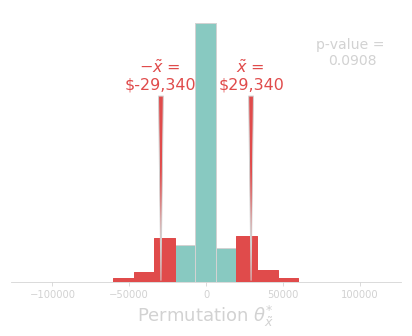

In [12]:
## Plots
fig = pyp.figure(figsize=(7,5))
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=2,concatOriginal=True,concatFirst=True);

# The histogram
axs[0].hist(D_boots, bins=11, color = col['blue'], edgecolor=col['grey'],zorder=0);
axs[0].set_xlabel(r'Permutation $\theta^{*}_{\tilde{x}}$', size = 18)

# Bins greater than actual
N,bins,pats = axs[1].hist(D_boots, bins=11, color = col['red'], edgecolor=col['red'],zorder=5);

binwidth = np.mean(np.diff(bins))
upperBins = bins[1:]+binwidth/2 >= D_actual;
lowerBins = bins[:-1]-binwidth/2 <= -D_actual;

for lgc,ptch in zip(upperBins + lowerBins,pats):
    if ~lgc:
        ptch.remove()

# The actual
axs[2].annotate(
    r'$\tilde{x}$' + f' = \n\${D_actual:,.0f}',
    xy = (D_actual,0),
    xytext = (D_actual,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=16,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red'],
        
    },
    zorder=100
);
axs[2].annotate(
    r'$-\tilde{x}$' + f' = \n\${-D_actual:,.0f}',
    xy = (-D_actual,0),
    xytext = (-D_actual,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=16,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red']
    },
    zorder=100
);
axs[1].text(
    127148*0.75,axs[0].get_ylim()[1]*0.9,
    f'p-value = \n{p1:0.4f}',
    ha = 'center',
    va = 'top',
    size = 14
);

## format axes:
for ax in axs:
    if ax is not axs[0]:
        ax.axis('off');
    ax.set_ylim(axs[1].get_ylim());
    ax.set_xlim((-127148,127148))
    ax.spines['left'].set_visible(False);
    ax.set_yticks([]);

fig.savefig('../img/UCLAperms.svg', transparent=True);

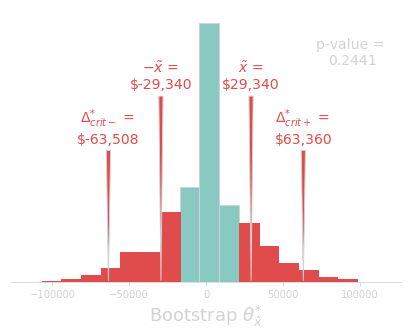

In [14]:
## Plots BOOTSTRAP
bSort = np.sort(D_bootsR)
bcrit = [bSort[250],bSort[9750]];
fig = pyp.figure(figsize=(7,5))
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=3,concatOriginal=True,concatFirst=True);

# The histogram
axs[0].hist(D_bootsR, bins=19, color = col['blue'], edgecolor=col['grey'],zorder=0);
axs[0].set_xlabel(r'Bootstrap $\theta^{*}_{\tilde{x}}$', size = 18)

# Bins greater than actual
N,bins,pats = axs[1].hist(D_bootsR, bins=19,color = col['red'], edgecolor=col['red'],zorder=5);

binwidth = np.mean(np.diff(bins))
upperBins = bins[1:]+binwidth/2 >= D_actual;
lowerBins = bins[:-1]-binwidth/2 <= -D_actual;

for lgc,ptch in zip(upperBins + lowerBins,pats):
    if ~lgc:
        ptch.remove()

# The actual
axs[2].annotate(
    r'$\tilde{x}$' + f' = \n\${D_actual:,.0f}',
    xy = (D_actual,0),
    xytext = (D_actual,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red'],
        
    },
    zorder=100
);
axs[2].annotate(
    r'$-\tilde{x}$' + f' = \n\${-D_actual:,.0f}',
    xy = (-D_actual,0),
    xytext = (-D_actual,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red']
    },
    zorder=100
);
axs[1].text(
    127148*0.75,axs[0].get_ylim()[1]*0.9,
    f'p-value = \n{pR:0.4f}',
    ha = 'center',
    va = 'top',
    size = 14
);

## crit
axs[3].annotate(
    r'$\Delta_{crit-}^{*}$' + f' = \n\${bcrit[0]:,.0f}',
    xy = (bcrit[0],0),
    xytext = (bcrit[0],axs[1].get_ylim()[1]*0.5),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red'],
        
    },
    zorder=100
);
axs[3].annotate(
    r'$\Delta_{crit+}^{*}$' + f' = \n\${bcrit[1]:,.0f}',
    xy = (bcrit[1],0),
    xytext = (bcrit[1],axs[1].get_ylim()[1]*0.5),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red']
    },
    zorder=100
);
## format axes:
for ax in axs:
    if ax is not axs[0]:
        ax.axis('off');
    ax.set_ylim(axs[0].get_ylim());
    ax.set_xlim((-127148,127148));
    ax.spines['left'].set_visible(False);
    ax.set_yticks([]);

fig.savefig('../img/UCLAboots.svg', transparent=True);

In [14]:
p1 = (np.sum(D_boots >= D_actual) + np.sum(D_boots <= -D_actual))/B;
pR = (np.sum(D_bootsR >= D_actual) + np.sum(D_bootsR <= -D_actual))/B;
print(f'perm = {p1:0.2f}', f'rand = {pR:0.2f}')

perm = 0.09 rand = 0.25


## Carbon Dioxide uptake

Experimental data on cold tolerance of the grass species Echinochloa crus-galli. The $CO_2$ uptake of six plants from Quebec and six plants from Mississippi was measured at several levels of ambient $CO_2$ concentration. Half of the plants of each type were chilled overnight before the experiment was conducted. Let's test if $CO_2$ uptake is different in chilled and nonchilled plants.

In [3]:
# import data
from scipy import optimize
co2 = pd.read_csv('data/CO2Plants.csv');
groups = co2.groupby('Treatment');

groupDots = [];
groupKDE = [];
groupNames = [];
groupStats = [];
groupECDF = [];
for grp in groups:    
    groupDots.append(st.makeDots(grp[1]['uptake'],type='disc', bins=len(grp[1]['uptake'])-15));
    groupKDE.append(stats.kde.gaussian_kde(grp[1]['uptake']));
    groupNames.append(grp[0]);
    #stats
    tmpstats = {
        'data': grp[1]['uptake'],
        'mean': np.mean(grp[1]['uptake']),
        'sd': np.std(grp[1]['uptake'],ddof=1),
        'median': np.median(grp[1]['uptake']),
        'shapiro': stats.shapiro(grp[1]['uptake'])
    };
    
    
    
    groupStats.append(tmpstats);
    # ecdf
    tmpecdf = st.ECDF(grp[1]['uptake']);
    tmpnorm = stats.norm.ppf(
               tmpecdf(grp[1]['uptake']),
               groupStats[-1]['mean'],
               groupStats[-1]['sd']
           );
    tmpslope = np.diff(
               np.percentile(grp[1]['uptake'],q=[25,75])
           ) / np.diff(
               stats.norm.ppf(
                   stats.norm.cdf(
                       np.percentile(tmpnorm,q=[25,75]),
                       groupStats[-1]['mean'],
                       groupStats[-1]['sd']
                   ),
                   groupStats[-1]['mean'],
                   groupStats[-1]['sd']
               )
           );
    groupECDF.append(
       {
           'ecdf': tmpecdf,
           'norm': tmpnorm,
           'slope': tmpslope,
           'int': np.percentile(grp[1]['uptake'],q=25)-tmpslope*np.percentile(tmpnorm,q=25)
       } 
    );
co2.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


In [22]:
288*420/360


336.0

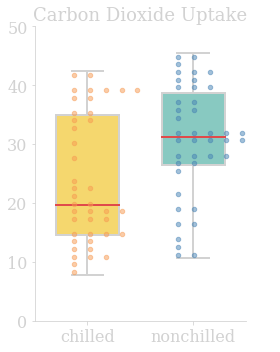

In [20]:
# make a boxplot
def sweepMean(ar,ofst=0):
    ar = np.array(ar);
    return ar - np.mean(ar)+ofst

boxcols = ['yellow', 'blue'];
dotcols = ['orange', 'satBlue'];

    
fig = pyp.figure(figsize=(4,5))
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=2,concatOriginal=True,concatFirst=False);
bxs = co2.boxplot(
    'uptake', 
    by='Treatment', 
    ax = axs[0],
    grid=False,
    return_type='dict',
    patch_artist=True,
    widths=0.6
);
for bb in bxs['uptake']:
    for b in range(len(bxs['uptake'][bb])):
        if bb == 'medians':
            bxs['uptake'][bb][b].set(color=col['red'], linewidth=2);
            continue
        if bb == 'boxes':
            bxs['uptake'][bb][b].set(edgecolor=col['grey'], linewidth=2, facecolor = col[boxcols[b]]);
            continue
        
        bxs['uptake'][bb][b].set(color=col['grey'], linewidth=2);

axs[0].set_title('Carbon Dioxide Uptake',size=18);
axs[0].set_xlabel('')
for ax in axs:
    ax.set_ylim((0,50));
    ax.tick_params(axis='both', labelsize = 16);
    if ax is not axs[-1]:
        ax.axis('off');


# Remove text overlay
for cc in fig.get_children():
    if isinstance(cc, mpl.text.Text):
        cc.remove();

# Overlay the points
for d in range(len(groupDots)):
    axs[1].scatter(
        sweepMean(st.linRescale(val=groupDots[d]['y'],newRange = (-0.3,0.3)),d+1),
        groupDots[d]['x'],
        color=col[dotcols[d]],
        marker='.',
        s=80,
        alpha = 0.5,
        
    );

fig.tight_layout();
fig.savefig('../img/CO2_box.svg', transparent=True);

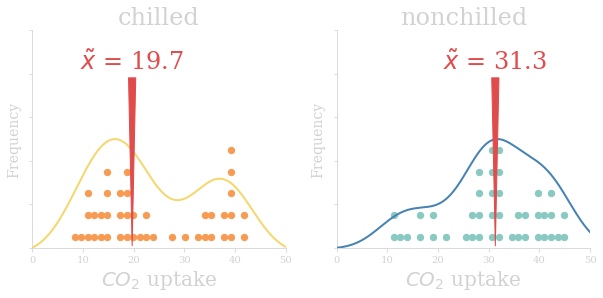

In [18]:
X = np.linspace(0,50,500);
fig = pyp.figure(figsize=(10,4));
axs = fig.subplots(1,2);
axs = [utils.multiX(ax=a,n=1,concatOriginal=True,concatFirst=True)for a in axs];

# left 'chilled'
axs[0][0].scatter(**groupDots[0],color=col['orange'],s=40);
axs[0][0].set_ylabel('Frequency',size=14);
axs[0][0].set_xlabel('$CO_2$ uptake', size=20);
axs[0][0].set_title(groupNames[0], size=24);
axs[0][1].plot(X,st.linRescale(groupKDE[0](X),newRange=(np.min(groupKDE[1](X)), 5)),color=col['yellow'],lw=2);
axs[0][1].annotate(
    r'$\tilde{x}$'+f' = {groupStats[0]["median"]}',
    xy = (groupStats[0]['median'],0),
    xytext = (groupStats[0]['median'],8),
    color = col['red'],
    size=24,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['red'],
        'facecolor': col['red']
    },
    zorder=100
);
axs[0][0].set_xlim((0,50));
#right 'nonchilled'
axs[1][0].scatter(**groupDots[1], color=col['blue'],s=40);
axs[1][0].set_ylabel('Frequency',size=14);
axs[1][0].set_xlabel('$CO_2$ uptake', size=20);
axs[1][0].set_title(groupNames[1], size=24);
axs[1][1].plot(X,st.linRescale(groupKDE[1](X),newRange=(np.min(groupKDE[1](X)), 5)),color=col['satBlue'],lw=2);
axs[1][1].annotate(
    r'$\tilde{x}$'+f' = {groupStats[1]["median"]}',
    xy = (groupStats[1]['median'],0),
    xytext = (groupStats[1]['median'],8),
    color = col['red'],
    size=24,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['red'],
        'facecolor': col['red']
    },
    zorder=100
);
axs[1][0].set_xlim((0,50));


for ax in axs:
    for a in ax:
        #a.spines['left'].set_visible(False);
        a.set_ylim((0,10));
        a.set_yticklabels('');
        if a is not axs[0][0]: 
            if a is not axs[1][0]:
                a.axis('off');
fig.savefig('../img/CO2_dots.svg', transparent=True);

In [24]:
1000/720*288


400.0

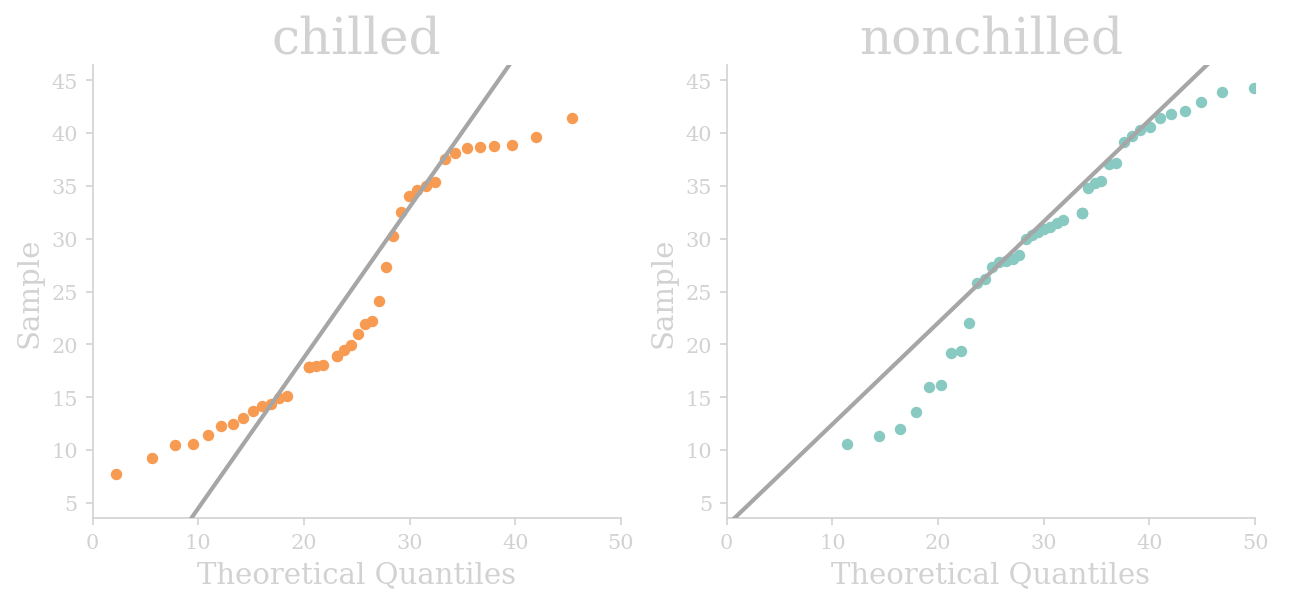

In [19]:
## Assess normality
# pyp.scatter(
#     groupECDF[0]['norm'],
#     groups.get_group(groupNames[0]).uptake
# )
x = np.array([0,50]);
fig = pyp.figure(figsize=(10,4),dpi=150);
axs = fig.subplots(1,2);
axs = [utils.multiX(ax=a,n=1,concatOriginal=True,concatFirst=True)for a in axs];

# left 'chilled'
axs[0][0].scatter(groupECDF[0]['norm'],groupStats[0]['data'],color=col['orange'],s=80,marker='.',zorder=100);
axs[0][0].set_ylabel('Sample',size=14);
axs[0][0].set_xlabel('Theoretical Quantiles', size=14);
axs[0][0].set_title(groupNames[0], size=24);
axs[0][1].plot(
    x,
    x*groupECDF[0]['slope']+groupECDF[0]['int'],
    color=col['grey2'],
    lw=2,
    zorder=0
);
# axs[0][0].set_xlim([0,50]);
# axs[0][0].set_ylim([0,50]);

#right 'nonchilled'
axs[1][0].scatter(groupECDF[1]['norm'],groupStats[1]['data'],color=col['blue'],s=80,marker='.',zorder=100);
axs[1][0].set_ylabel('Sample',size=14);
axs[1][0].set_xlabel('Theoretical Quantiles', size=14);
axs[1][0].set_title(groupNames[1], size=24);
axs[1][1].plot(
    x,
    x*groupECDF[1]['slope']+groupECDF[1]['int'],
    color=col['grey2'],
    lw=2,
    zorder=0
);
# axs[1][0].set_xlim([0,50]);
# axs[1][0].set_ylim([0,50]);

# format
for ax in axs:
    for a in ax:
        a.axis('equal');
        a.set_xlim([0,50]);
        a.set_ylim([0,50]);
        #a.spines['left'].set_visible(False);
        if a is not axs[0][0]: 
            if a is not axs[1][0]:
                a.axis('off');

fig.savefig('../img/CO2_QQ.svg', transparent=True);

In [99]:
#shapiro wilks test for normality
print(groupStats[0]['shapiro'],groupStats[1]['shapiro'])


(0.8978850841522217, 0.0012450902722775936) (0.9450491070747375, 0.04302014037966728)


Shapiro wilks test:
$$W={\left(\sum _{i=1}^{n}a_{i}x_{(i)}\right)^{2} \over \sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}$$

Based on both visual inspection, QQ-plot, and the Shapiro Wilks test, we conclude that nither data are normally distributed.

In [100]:
# equality of variance
print('fligner test:', stats.fligner(*[a['data'] for a in groupStats]))

fligner test: FlignerResult(statistic=1.4030071086410467, pvalue=0.23622073087321596)


Fligner-Killeen test checks for homogeneity of variance, but is a much better option when data are non-normally distributed or when problems related to outliers in the dataset cannot be resolved

We cannot conclude that variances are unequal.

In [4]:
# bootstrap

B = 10000
stat = np.median;
actualM = groupStats[0]['median'] - groupStats[1]['median'];
actualU = groupStats[0]['mean'] - groupStats[1]['mean'];
actualW = welchT(groupStats[0]['data'],groupStats[1]['data']);

twob = [np.array(a['data']) for a in groupStats];
N = [len(a) for a in twob];

oneb = np.concatenate(twob);
twobM = [a-np.median(a) for a in twob];
twobU = [a-np.mean(a) for a in twob];

D_one = np.zeros(B);
D_two = np.zeros(B);
D_Welch = np.zeros(B);
D_Ef = np.zeros(B);

for i in range(B):
    xOne = np.random.choice(oneb, N[0], replace=True);
    yOne = np.random.choice(oneb, N[1], replace=True);
    xTwo = np.random.choice(twobM[0], N[0], replace=True);
    yTwo = np.random.choice(twobM[1], N[1], replace=True);
    xWelch = np.random.choice(twobU[0], N[0], replace=True);
    yWelch = np.random.choice(twobU[1], N[1], replace=True);
    xEf = np.random.choice(twob[0], N[0], replace=True);
    yEf = np.random.choice(twob[1], N[1], replace=True);
    
    D_one[i] = np.median(xOne)-np.median(yOne);
    D_two[i] = np.median(xTwo)-np.median(yTwo);
    D_Welch[i] = welchT(xWelch,yWelch);
    D_Ef[i] = np.median(xEf)-np.median(yEf);

P_one = np.sum(np.abs(D_one) >= np.abs(actualM))/B;
P_two = np.sum(np.abs(D_two) >= np.abs(actualM))/B;
P_Welch = np.sum(np.abs(D_Welch) >= np.abs(actualW))/B;
CI_Ef = np.percentile(D_Ef, q=[2.5,97.5]);
CI_two = np.percentile(D_two, q=[2.5,97.5]);
CI_one = np.percentile(D_one, q=[2.5,97.5]);

print(P_one)
print(P_two)
print(P_Welch)
print(CI_Ef)
print(CI_two)

0.014
0.0131
0.924
[-15.6   -2.15]
[-4.05  9.65]


-1.14604987539


(array([ 2080.,   924.,   730.,   653.,   650.,   630.,   673.,   719.,
          926.,  2015.]),
 array([ -9.16515139e+00,  -7.33212111e+00,  -5.49909083e+00,
         -3.66606056e+00,  -1.83303028e+00,   1.77635684e-15,
          1.83303028e+00,   3.66606056e+00,   5.49909083e+00,
          7.33212111e+00,   9.16515139e+00]),
 <a list of 10 Patch objects>)

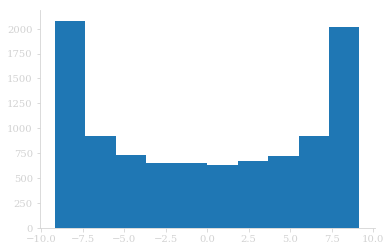

In [125]:
print(actualW)
pyp.hist(D_Welch)

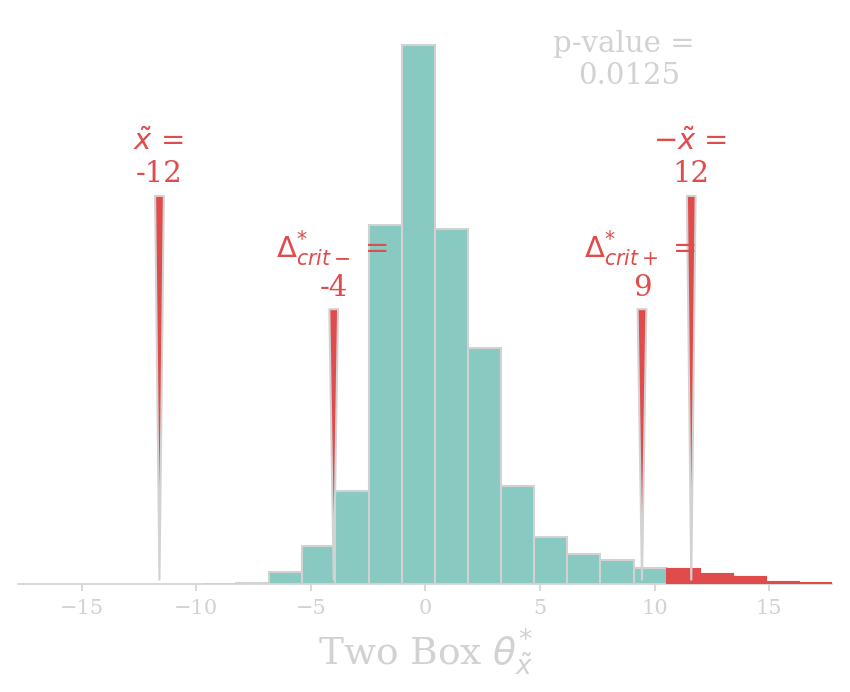

In [148]:
fig = pyp.figure(figsize=(7,5),dpi=150)
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=3,concatOriginal=True,concatFirst=True);

# The histogram
axs[0].hist(D_two, bins=19, color = col['blue'], edgecolor=col['grey'],zorder=0);
axs[0].set_xlabel(r'Two Box $\theta^{*}_{\tilde{x}}$', size = 18)

# Bins greater than actual
N,bins,pats = axs[1].hist(D_two, bins=19,color = col['red'], edgecolor=col['red'],zorder=5);

xrg = utils.domain(bins);

binwidth = np.mean(np.diff(bins))
upperBins = bins[1:]+binwidth/2 >= np.abs(actualM);
lowerBins = bins[:-1]-binwidth/2 <= -np.abs(actualM);

for lgc,ptch in zip(upperBins + lowerBins,pats):
    if ~lgc:
        ptch.remove()

# The actual
axs[2].annotate(
    r'$\tilde{x}$' + f' = \n{actualM:,.0f}',
    xy = (actualM,0),
    xytext = (actualM,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red'],
        
    },
    zorder=100
);
axs[2].annotate(
    r'$-\tilde{x}$' + f' = \n{-actualM:,.0f}',
    xy = (-actualM,0),
    xytext = (-actualM,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red']
    },
    zorder=100
);
axs[1].text(
    xrg[1]*0.5,axs[0].get_ylim()[1]*0.98,
    f'p-value = \n{P_two:0.4f}',
    ha = 'center',
    va = 'top',
    size = 14
);

## crit
axs[3].annotate(
    r'$\Delta_{crit-}^{*}$' + f' = \n{CI_two[0]:,.0f}',
    xy = (CI_two[0],0),
    xytext = (CI_two[0],axs[1].get_ylim()[1]*0.5),
    color = col['red'],
    size=14,
    ha = 'center',
    
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red'],
        
    },
    zorder=100
);
axs[3].annotate(
    r'$\Delta_{crit+}^{*}$' + f' = \n{CI_two[1]:,.0f}',
    xy = (CI_two[1],0),
    xytext = (CI_two[1],axs[1].get_ylim()[1]*0.5),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red']
    },
    zorder=100
);
## format axes:
for ax in axs:
    if ax is not axs[0]:
        ax.axis('off');
    ax.set_ylim(axs[0].get_ylim());
    ax.set_xlim([-np.max(xrg),np.max(xrg)]);
    ax.spines['left'].set_visible(False);
    ax.set_yticks([]);

fig.savefig('../img/CO2_PVAL.svg', transparent=True);

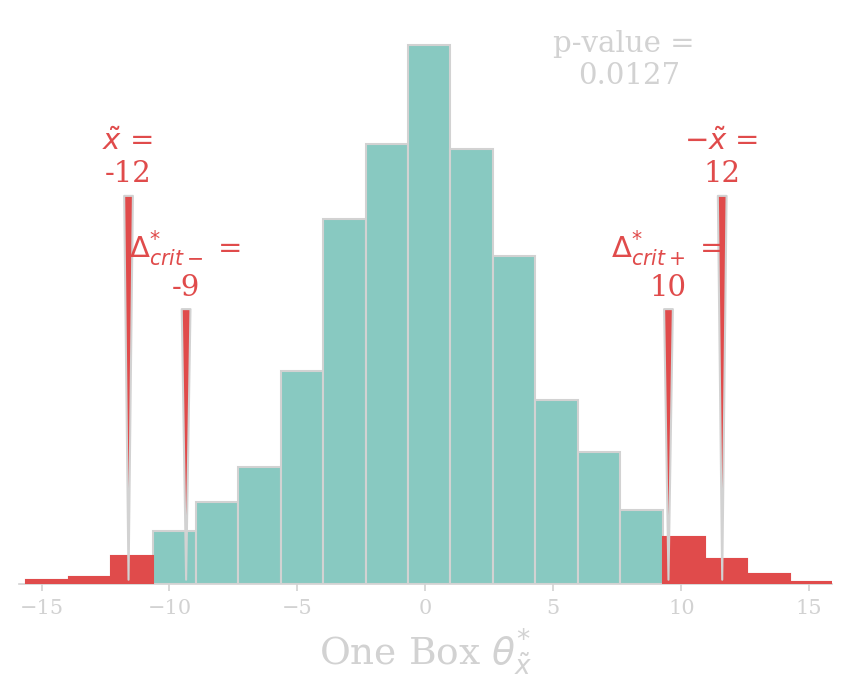

In [149]:
fig = pyp.figure(figsize=(7,5),dpi=150)
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=3,concatOriginal=True,concatFirst=True);

# The histogram
axs[0].hist(D_one, bins=19, color = col['blue'], edgecolor=col['grey'],zorder=0);
axs[0].set_xlabel(r'One Box $\theta^{*}_{\tilde{x}}$', size = 18)

# Bins greater than actual
N,bins,pats = axs[1].hist(D_one, bins=19,color = col['red'], edgecolor=col['red'],zorder=5);

xrg = utils.domain(bins);

binwidth = np.mean(np.diff(bins))
upperBins = bins[1:]+binwidth/2 >= np.abs(actualM);
lowerBins = bins[:-1]-binwidth/2 <= -np.abs(actualM);

for lgc,ptch in zip(upperBins + lowerBins,pats):
    if ~lgc:
        ptch.remove()

# The actual
axs[2].annotate(
    r'$\tilde{x}$' + f' = \n{actualM:,.0f}',
    xy = (actualM,0),
    xytext = (actualM,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red'],
        
    },
    zorder=100
);
axs[2].annotate(
    r'$-\tilde{x}$' + f' = \n{-actualM:,.0f}',
    xy = (-actualM,0),
    xytext = (-actualM,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red']
    },
    zorder=100
);
axs[1].text(
    xrg[1]*0.5,axs[0].get_ylim()[1]*0.98,
    f'p-value = \n{P_one:0.4f}',
    ha = 'center',
    va = 'top',
    size = 14
);

## crit
axs[3].annotate(
    r'$\Delta_{crit-}^{*}$' + f' = \n{CI_one[0]:,.0f}',
    xy = (CI_one[0],0),
    xytext = (CI_one[0],axs[1].get_ylim()[1]*0.5),
    color = col['red'],
    size=14,
    ha = 'center',
    
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red'],
        
    },
    zorder=100
);
axs[3].annotate(
    r'$\Delta_{crit+}^{*}$' + f' = \n{CI_one[1]:,.0f}',
    xy = (CI_one[1],0),
    xytext = (CI_one[1],axs[1].get_ylim()[1]*0.5),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red']
    },
    zorder=100
);
## format axes:
for ax in axs:
    if ax is not axs[0]:
        ax.axis('off');
    ax.set_ylim(axs[0].get_ylim());
    ax.set_xlim([-np.max(xrg),np.max(xrg)]);
    ax.spines['left'].set_visible(False);
    ax.set_yticks([]);

fig.savefig('../img/CO2_PVAL_ONEB.svg', transparent=True);

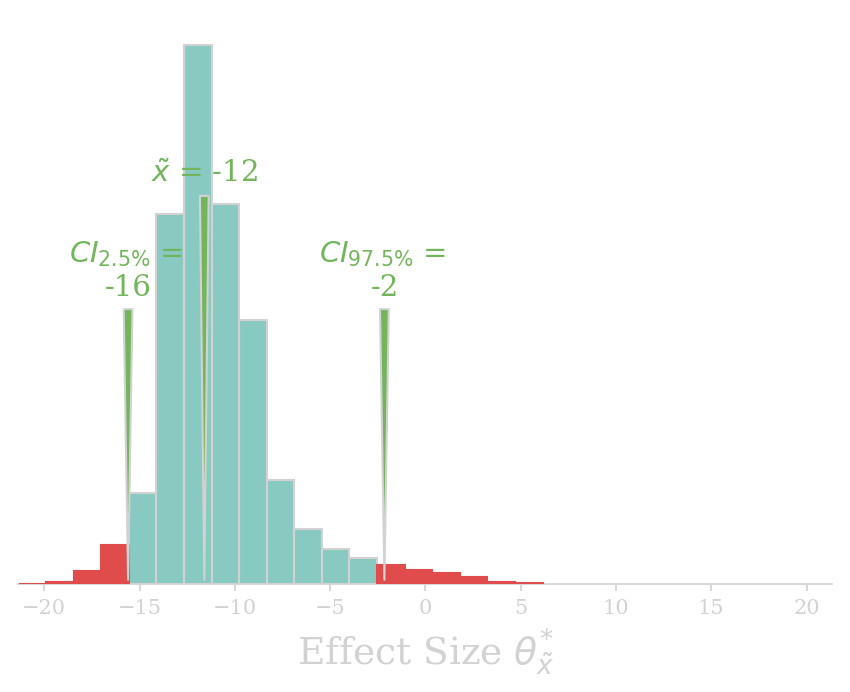

In [17]:
#effect size
fig = pyp.figure(figsize=(7,5),dpi=150)
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=2,concatOriginal=True,concatFirst=True);

# The histogram
axs[0].hist(D_Ef, bins=19, color = col['blue'], edgecolor=col['grey'],zorder=0);
axs[0].set_xlabel(r'Effect Size $\theta^{*}_{\tilde{x}}$', size = 18)

# Bins greater than actual
N,bins,pats = axs[1].hist(D_Ef, bins=19,color = col['red'], edgecolor=col['red'],zorder=5);

xrg = utils.domain(bins);

binwidth = np.mean(np.diff(bins))
upperBins = bins[1:]-binwidth/2 > CI_Ef[1];
lowerBins = bins[:-1]+binwidth/2 < CI_Ef[0];

for lgc,ptch in zip(upperBins + lowerBins,pats):
    if ~lgc:
        ptch.remove()

# The actual
axs[2].annotate(
    r'$\tilde{x}$' + f' = {actualM:,.0f}',
    xy = (actualM,0),
    xytext = (actualM,axs[1].get_ylim()[1]*0.7),
    color = col['green'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['green'],
        
    },
    zorder=100
);


## crit
axs[1].annotate(
    r'$CI_{2.5\%}$' + f' = \n{CI_Ef[0]:,.0f}',
    xy = (CI_Ef[0],0),
    xytext = (CI_Ef[0],axs[1].get_ylim()[1]*0.5),
    color = col['green'],
    size=14,
    ha = 'center',
    
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['green'],
        
    },
    zorder=100
);
axs[1].annotate(
    r'$CI_{97.5\%}$' + f' = \n{CI_Ef[1]:,.0f}',
    xy = (CI_Ef[1],0),
    xytext = (CI_Ef[1],axs[1].get_ylim()[1]*0.5),
    color = col['green'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['green']
    },
    zorder=100
);
## format axes:
for ax in axs:
    if ax is not axs[0]:
        ax.axis('off');
    ax.set_ylim(axs[0].get_ylim());
    ax.set_xlim([-np.max(np.abs(xrg)),np.max(np.abs(xrg))]);
    ax.spines['left'].set_visible(False);
    ax.set_yticks([]);

fig.savefig('../img/CO2_Effectsize.svg', transparent=True);

In [101]:
col

{'blue': '#88C9C1',
 'dkBlue': '#001526',
 'dkGrey': '#202020',
 'dkRed': '#362121',
 'green': '#73B55B',
 'grey': '#d2d2d2',
 'grey2': '#a6a6a6',
 'offwhite': '#FFF8D0',
 'orange': '#F79A52',
 'purple': '#9469AD',
 'red': '#E04B4B',
 'satBlue': '#4682B4',
 'yellow': '#F5D76E'}

In [18]:
groups.get_group(groupNames[0]).uptake

21    14.2
22    24.1
23    30.3
24    34.6
25    32.5
26    35.4
27    38.7
28     9.3
29    27.3
30    35.0
31    38.8
32    38.6
33    37.5
34    42.4
35    15.1
36    21.0
37    38.1
38    34.0
39    38.9
40    39.6
41    41.4
63    10.5
64    14.9
65    18.1
66    18.9
67    19.5
68    22.2
69    21.9
70     7.7
71    11.4
72    12.3
73    13.0
74    12.5
75    13.7
76    14.4
77    10.6
78    18.0
79    17.9
80    17.9
81    17.9
82    18.9
83    19.9
Name: uptake, dtype: float64